# Particle Swam Evolution Analysis

*Results from PSO process, including Matlab - HFSS - Optenni, are extracted and shown here*

In [1]:
import matplotlib.pyplot as plt
from numpy import *

First, we need to get data from the result log files

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
psolog = open('pso.log', 'r', encoding = 'utf8')
psoline = [line.split() for line in psolog]
feature_range_text = psoline[5]
feature_range = [float(i) for i in feature_range_text]

In [4]:
swam = open('pso_location.log', 'r', encoding = 'utf8')
n = -1
m = 0
swlist = []
for line in swam:
    split_line = line.split();
    if is_number(split_line[0]):
        swlist[n].append([])
        swlist[n][m].extend([float(position) for position in split_line])
        m = m + 1
    else:
        swlist.append([])
        n = n + 1
        m = 0
swam.close()

In [5]:
gbest = open('pso_gbest.log', 'r', encoding = 'utf8')
gbest_list = [float(line.split()[0]) for line in gbest if is_number(line.split()[0])]

### Show off figures to visualize what happens during PSO

In [6]:
evolutions = len(swlist)
agents = len(swlist[0])
features = len(swlist[0][0])
print(f'There are {agents} agents with {features} features are concerned in {evolutions - 1} evolutions')
swam_list = array(swlist)

There are 12 agents with 6 features are concerned in 21 evolutions


*Covergence Ratio* is formulated by calculation the ratio of standard deviation over range of feature. 

$CR=\frac{\sqrt{\frac{\sum_{i = 0}^{N}{(x_i - \overline{x})^2}}{N - 1}}}{range(x_i)}$

This figure will give an idea which feature is giving more impact to convergence process. Lets say, if a feature has *Convergence Ratio* below 0.05, it is called *Decisive Feature* 

In [7]:
def evolution_plot(feature):
    try:
        component = range(evolutions)
        plt.plot(component, swam_list[:,0,feature],'r-', label = "line1")
        plt.plot(component, swam_list[:,1,feature],'r--', label = "line2")
        plt.plot(component, swam_list[:,2,feature],'r-.', label = "line3")
        plt.plot(component, swam_list[:,3,feature],'g-', label = "line4")
        plt.plot(component, swam_list[:,4,feature],'g--', label = "line5")
        plt.plot(component, swam_list[:,5,feature],'g-.', label = "line6")
        plt.plot(component, swam_list[:,6,feature],'b-', label = "line7")
        plt.plot(component, swam_list[:,7,feature],'b--', label = "line8")
        plt.plot(component, swam_list[:,8,feature],'b-.', label = "line9")
        plt.plot(component, swam_list[:,9,feature],'m-', label = "line10")
        plt.plot(component, swam_list[:,10,feature],'m--', label = "line11")
        plt.plot(component, swam_list[:,11,feature],'m-.', label = "line12")
        plt.grid(b = True, which = "major", axis = "both")
        plt.xlabel("Generations")
        plt.ylabel(f'Feature {feature}')
        plt.title(f'Convergence ratio: {std(swam_list[evolutions - 1,:,feature])/feature_range[feature]}')
        plt.show()
    except IndexError:
        print(f"Out of Feature index: input should be from 0 to {features - 1}")

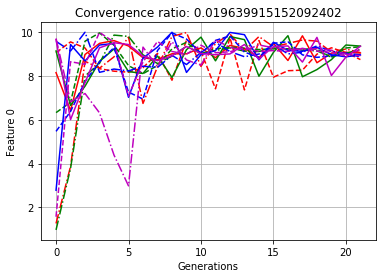

In [8]:
evolution_plot(0)

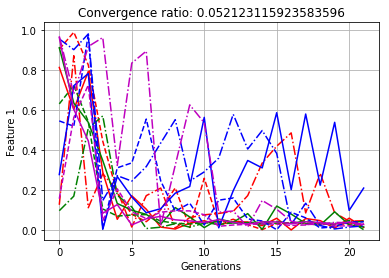

In [9]:
evolution_plot(1)

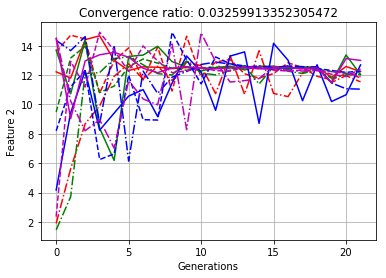

In [10]:
evolution_plot(2)

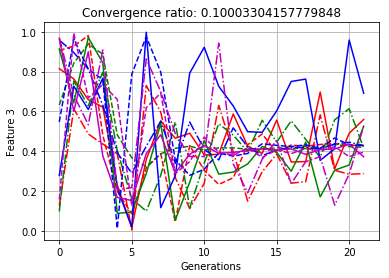

In [11]:
evolution_plot(3)

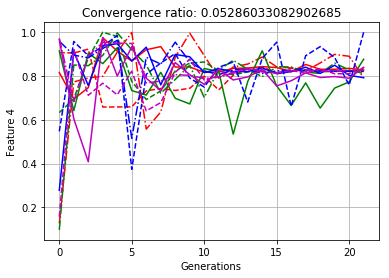

In [12]:
evolution_plot(4)

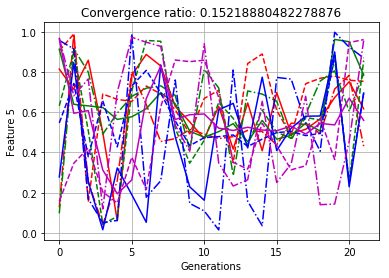

In [13]:
evolution_plot(5)

In [14]:
evolution_plot(6)

Out of Feature index: input should be from 0 to 5


## Conclusions:

1. So, in this case, first feature is *Decisive Features*. Which means, they impact a lot to convergence. In this case, the first one is *gap length* is effectively decide the convergent speed

2. Other features are less effective to changes. Especially, with lass feature, *slot width*, it almost doesn't converge.


## ??? Is it Converge?

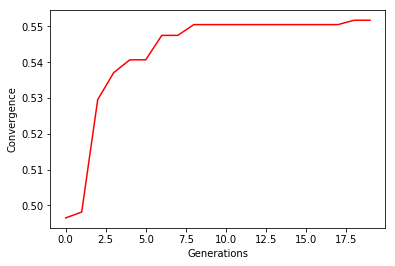

In [15]:
gbestXaxis = range(len(gbest_list))
plt.plot(gbestXaxis, gbest_list, 'r')
plt.xlabel('Generations')
plt.ylabel('Convergence')
plt.show()